<a href="https://colab.research.google.com/github/sherlythinker/ChatGPT-GoogleStock_DATASCI-112/blob/main/Meta_Analysis_IRLG_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So we're going to load our data and make our mixed model.

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the CSV data into a DataFrame
df = pd.read_csv('/content/Clean_data.csv')  # Replace with the path to your CSV file

# Define the formula for the mixed-effects model
formula = ("Violence ~ 1 + Dehumanization + Dislike + ZNeg_Emotions + ZImmoral + ZStupid + "
           "ZTrait_Aggression + ZSDO + ZRWA")

# Fit the mixed-effects model
mixed_model = smf.mixedlm(formula, df, groups=df["Participant"], re_formula="~1+Dehumanization",
                          vc_formula={"Target": "0 + C(Target)"})
mixed_fit = mixed_model.fit()

# Display the summary of the model
print(mixed_fit.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     Violence  
No. Observations:      1194        Method:                 REML      
No. Groups:            398         Scale:                  0.5533    
Min. group size:       3           Log-Likelihood:         -2072.7507
Max. group size:       3           Converged:              Yes       
Mean group size:       3.0                                           
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   3.774    0.053 70.942 0.000  3.669  3.878
Dehumanization              0.561    0.065  8.674 0.000  0.434  0.687
Dislike                    -0.048    0.056 -0.848 0.396 -0.158  0.063
ZNeg_Emotions               0.546    0.072  7.609 0.000  0.405  0.686
ZImmoral                    0.463   

Considering that python's statsmodel library typically does the z-test, we'll need to calculate the t-values, degrees of freedom, and p-values manually (almost).

In [4]:
from scipy.stats import t

#Extract coefficients and standard errors
coefficients = mixed_fit.params
standard_errors = mixed_fit.bse

# Calculate t-values
t_values = coefficients / standard_errors

# Calculate degrees of freedom
n_obs = len(df)
n_fixed_effects = len(coefficients)
degrees_of_freedom = n_obs - n_fixed_effects - 1

# Calculate two-sided p-values
p_values = 2 * (1 - t.cdf(abs(t_values), df=degrees_of_freedom))

# Display t-values, degrees of freedom, and p-values
print("T-values:")
print(t_values)

print(f"\nDegrees of freedom: {degrees_of_freedom}")

print("\nP-values:")
print(p_values)

# Indicate significance levels
print("\nSignificance levels:")
for var, p_value in zip(coefficients.index, p_values):
    if p_value < 0.01:
        print(f"{var}: *** (p < 0.01)")
    elif p_value < 0.05:
        print(f"{var}: ** (p < 0.05)")
    elif p_value < 0.1:
        print(f"{var}: * (p < 0.1)")
    else:
        print(f"{var}: (p >= 0.1)")

T-values:
Intercept                     70.941847
Dehumanization                 8.674250
Dislike                       -0.848409
ZNeg_Emotions                  7.609275
ZImmoral                       6.731953
ZStupid                        5.038461
ZTrait_Aggression              2.151125
ZSDO                           3.560729
ZRWA                           3.475568
Group Var                           NaN
Group x Dehumanization Cov          NaN
Dehumanization Var                  NaN
Target Var                          NaN
dtype: float64

Degrees of freedom: 1180

P-values:
[0.00000000e+00 0.00000000e+00 3.96382232e-01 5.61772850e-14
 2.60698130e-11 5.42567488e-07 3.16688380e-02 3.84547551e-04
 5.28286554e-04            nan            nan            nan
            nan]

Significance levels:
Intercept: *** (p < 0.01)
Dehumanization: *** (p < 0.01)
Dislike: (p >= 0.1)
ZNeg_Emotions: *** (p < 0.01)
ZImmoral: *** (p < 0.01)
ZStupid: *** (p < 0.01)
ZTrait_Aggression: ** (p < 0.05)
ZSDO: *

NOT NATIVE DATA: Copied data from the RStudio mixed model

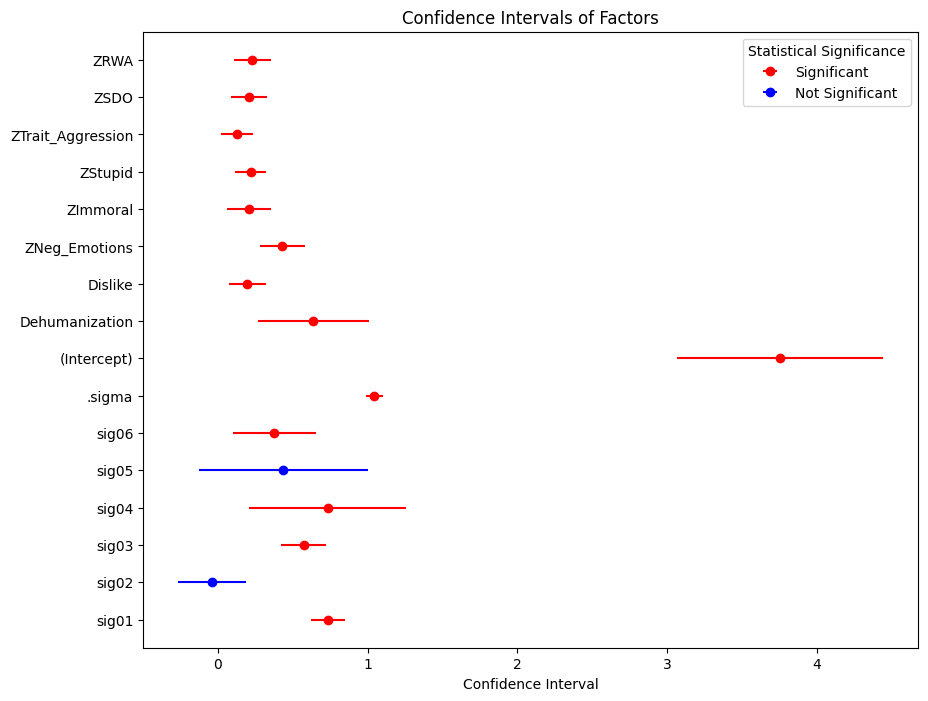

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for confidence intervals
factors = ['sig01', 'sig02', 'sig03', 'sig04', 'sig05', 'sig06', '.sigma', '(Intercept)',
           'Dehumanization', 'Dislike', 'ZNeg_Emotions', 'ZImmoral', 'ZStupid',
           'ZTrait_Aggression', 'ZSDO', 'ZRWA']

lower_bounds = [0.62027176, -0.26495540, 0.42170664, 0.21033032, -0.12799612, 0.09947769, 0.98841524,
                3.06433182, 0.26966932, 0.07123586, 0.27725100, 0.05713947, 0.11578866, 0.01678985, 0.08667567, 0.10825976]

upper_bounds = [0.8460347, 0.1857686, 0.7211978, 1.2568725, 1.0000000, 0.6544259, 1.0990510,
                4.4406912, 1.0056337, 0.3208241, 0.5779373, 0.3541235, 0.3201968, 0.2359913, 0.3275592, 0.3522245]

# Create the plot
plt.figure(figsize=(10, 8))
y_pos = np.arange(len(factors))

# Plot confidence intervals with color coding for significance
for y, lb, ub in zip(y_pos, lower_bounds, upper_bounds):
    color = 'red' if lb > 0 or ub < 0 else 'blue'
    plt.errorbar(x=(lb + ub) / 2, y=y, xerr=(ub - lb) / 2, fmt='o', color=color)

# Labeling and titling
plt.yticks(y_pos, factors)
plt.xlabel('Confidence Interval')
plt.title('Confidence Intervals of Factors')

# Legend
plt.legend(['Significant', 'Not Significant'], title='Statistical Significance')

# Show the plot
plt.show()


I don't know where the sig variables came from. I actually believe that they were somewhat derived from the model working with the random effects. I need to get some more work done on that.